<a href="https://colab.research.google.com/github/hargurjeet/holmusk_datascience_challenge/blob/main/Explainatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chronic Kidney Disease Dataset Challenge

As part of this challange, longitudinal data has been provided with lab measurements for partients diagnosed with chronic kedney disease(CKD).

I have performed explainatory data analysis for a time interval to understand the importance of various features w.r.t to the progress in CKD stage.

# **Table Of Contents**<a name="Top"></a>


---



---


  1. [About the Dataset](#AboutDataset)
  2. [Data Pre Processing](#Data-Pre)
  3. [Exploring the dataset](#Exploring)
  4. [Summary](#Summary)
  5. [References](#References)

# **1: About the Dataset** <a name="AboutDataset"></a>


---



# **2: Data Pre Processing** <a name="Data-Pre"></a>


---



# **3: Exploring the dataset** <a name="Exploring"></a>


---



# **4: Summary** <a name="Summary"></a>


---



# **5: References** <a name="References"></a>


---



In [ ]:
import pandas as pd

In [ ]:
demo = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_demo.csv')
cretinine = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_creatinine.csv')
dbp = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_DBP.csv')
sbp = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_SBP.csv')
hgb = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_HGB.csv')
glucose = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_glucose.csv')
ldl = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_ldl.csv')
meds = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_meds.csv')
stage = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_stage.csv')

In [ ]:
## merging all the dataframes
from functools import reduce
cretinine_t0 = cretinine[cretinine.time==0]
dbp_t0 = dbp[dbp.time==0]
sbp_t0 = sbp[sbp.time==0]
hgb_t0 = hgb[hgb.time==0]
glucose_t0 = glucose[glucose.time==0]
ldl_t0 = ldl[ldl.time==0]
# meds = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_meds.csv')
# stage = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/holmusk_datascience_challenge/main/T_stage.csv')

all_dataframes = [demo, cretinine_t0, dbp_t0, sbp_t0, hgb_t0, glucose_t0, ldl_t0, stage]
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['id'],
                                            how='left'), all_dataframes)

In [ ]:
df_merged.head()

,id,race,gender,age,value_x,time_x,value_y,time_y,value_x,time_x,value_y,time_y,value_x,time_x,value_y,time_y,Stage_Progress
0,0,Unknown,Male,70,1.29,0,95.32,0,134.11,0,13.51,0,6.24,0,161.49,0,True
1,1,White,Female,71,1.74,0,72.49,0,157.46,0,13.89,0,9.96,0,89.57,0,False
2,2,White,Female,57,2.51,0,81.13,0,132.89,0,15.34,0,7.24,0,61.62,0,True
3,3,White,Male,74,0.74,0,80.09,0,147.46,0,13.74,0,6.43,0,99.71,0,False
4,4,White,Female,50,1.34,0,82.23,0,128.78,0,13.21,0,8.76,0,65.73,0,True


In [ ]:
df_renamed= df_merged.drop(columns=['time_x', 'time_y',], axis=1)
df_renamed.columns = ['id', 'Race', 'Gender', 'Age', 'value_cretinine', 'value_dbp',
       'value_sbp', 'value_hgb', 'value_glucose', 'value_ldl', 'Stage_Progress']
df_renamed.head()

,id,Race,Gender,Age,value_cretinine,value_dbp,value_sbp,value_hgb,value_glucose,value_ldl,Stage_Progress
0,0,Unknown,Male,70,1.29,95.32,134.11,13.51,6.24,161.49,True
1,1,White,Female,71,1.74,72.49,157.46,13.89,9.96,89.57,False
2,2,White,Female,57,2.51,81.13,132.89,15.34,7.24,61.62,True
3,3,White,Male,74,0.74,80.09,147.46,13.74,6.43,99.71,False
4,4,White,Female,50,1.34,82.23,128.78,13.21,8.76,65.73,True


In [ ]:
df_renamed.shape

(300, 11)

# Explaintory Data Analysis

## How many male and females are progressing with CDK stage at t=0 days or the intial days

In [ ]:
df_renamed['Gender'].value_counts().index

Index(['Female', 'Male'], dtype='object')

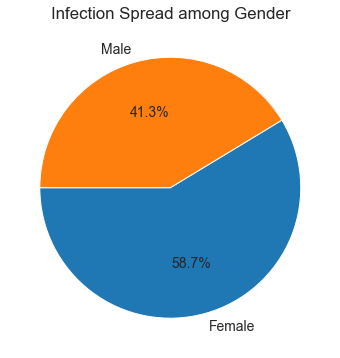

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.set_style('whitegrid')
plt.title('Infection Spread among Gender')
plt.pie((df_renamed['Gender'].value_counts()/(df_renamed['Gender'].value_counts()[0] + df_renamed['Gender'].value_counts()[1]))*100, labels=df_renamed['Gender'].value_counts().index , autopct='%1.1f%%', startangle=180);

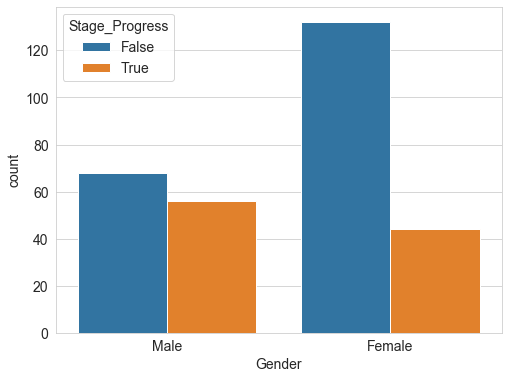

In [ ]:
plt.figure(figsize=(8,6))
ax = sns.countplot(x="Gender", hue ='Stage_Progress' ,data=df_renamed)
plt.show()

It seems the GKD progress rate is seems to progressing for most of the male where the infection is not progressing for more that 50% of women. Maybe Female have better resistance to the infection

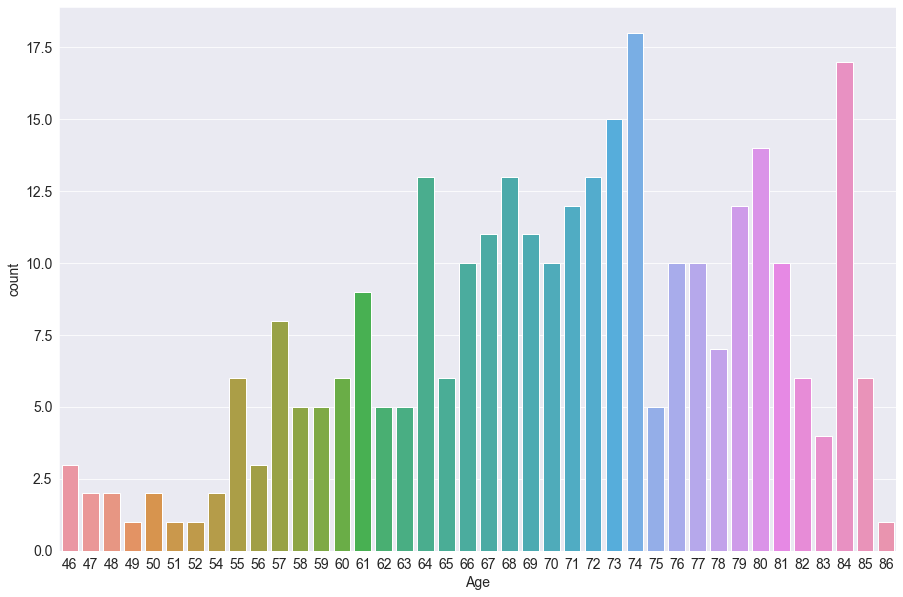

In [ ]:
import matplotlib
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

ax = sns.countplot(x='Age', data=df_renamed)
plt.show()

There seems to be increasing trend at the age of 64 to 74. I observ people with the age of 74 and 84 are maximum affected

## Does this disease has any relation with Race

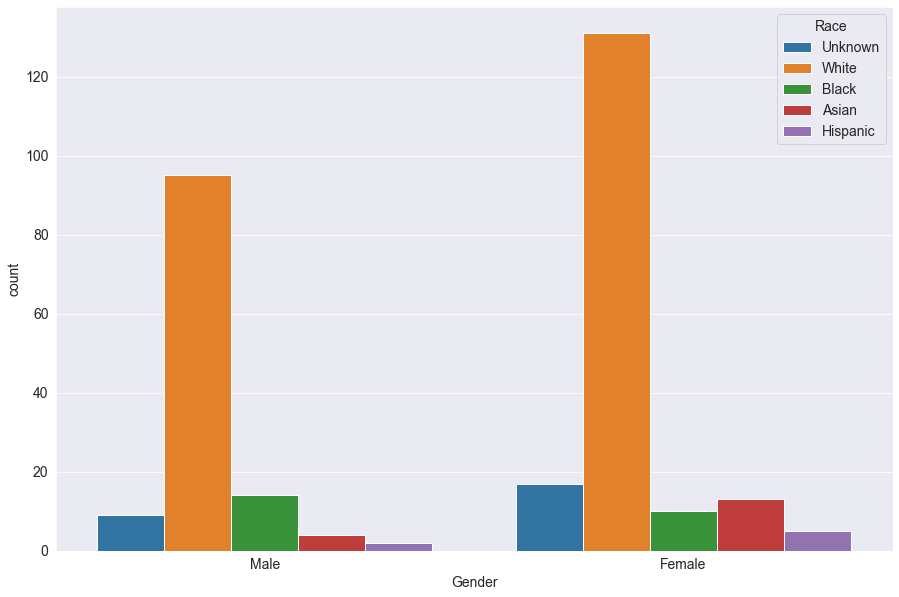

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x="Gender", hue ='Race' ,data=df_renamed)
plt.show()

Looks like people with race as white seems to be most affected

In [ ]:
df_renamed.head()

,id,Race,Gender,Age,value_cretinine,value_dbp,value_sbp,value_hgb,value_glucose,value_ldl,Stage_Progress
0,0,Unknown,Male,70,1.29,95.32,134.11,13.51,6.24,161.49,True
1,1,White,Female,71,1.74,72.49,157.46,13.89,9.96,89.57,False
2,2,White,Female,57,2.51,81.13,132.89,15.34,7.24,61.62,True
3,3,White,Male,74,0.74,80.09,147.46,13.74,6.43,99.71,False
4,4,White,Female,50,1.34,82.23,128.78,13.21,8.76,65.73,True


## Spread of DBP level

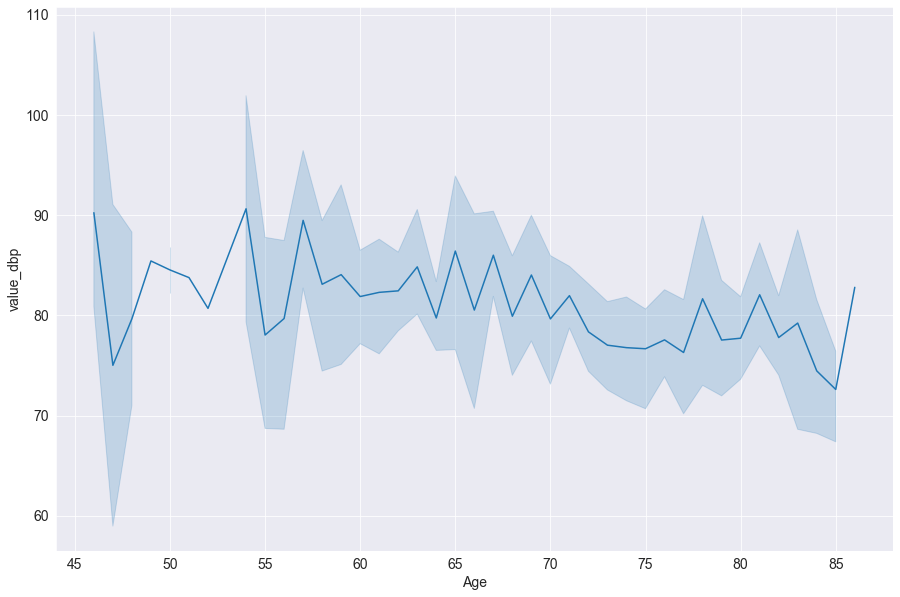

In [ ]:
sns.lineplot(data=df_renamed, x='Age', y='value_dbp') ;

I dont observ much varition across all ages, as the age increase this tends to shrink after the age 50. As we observed in eariler grapths Kindney infection seems to high at the age of 74 and 84, Whereas I observ here the DBP seems to be very low for the same ages. May be both are inversly propotional to each other.

## Spread of SBP level

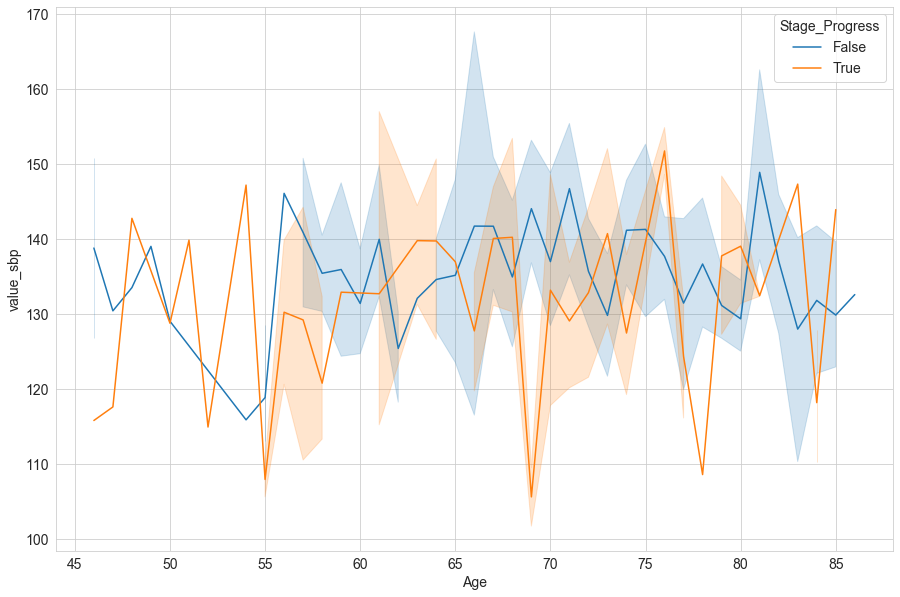

In [ ]:
sns.lineplot(data=df_renamed, x='Age', y='value_sbp', hue= 'Stage_Progress')

As the age increase the SBP level tends to increase
No clear realitonship between SBP and the infection

## Creatinine level

In [ ]:
df_renamed.head()

,id,Race,Gender,Age,value_cretinine,value_dbp,value_sbp,value_hgb,value_glucose,value_ldl,Stage_Progress
0,0,Unknown,Male,70,1.29,95.32,134.11,13.51,6.24,161.49,True
1,1,White,Female,71,1.74,72.49,157.46,13.89,9.96,89.57,False
2,2,White,Female,57,2.51,81.13,132.89,15.34,7.24,61.62,True
3,3,White,Male,74,0.74,80.09,147.46,13.74,6.43,99.71,False
4,4,White,Female,50,1.34,82.23,128.78,13.21,8.76,65.73,True


In [ ]:
creatinine_level_men = df_renamed[df_renamed['Gender']=='Male']
creatinine_level_female = df_renamed[df_renamed['Gender']=='Female']

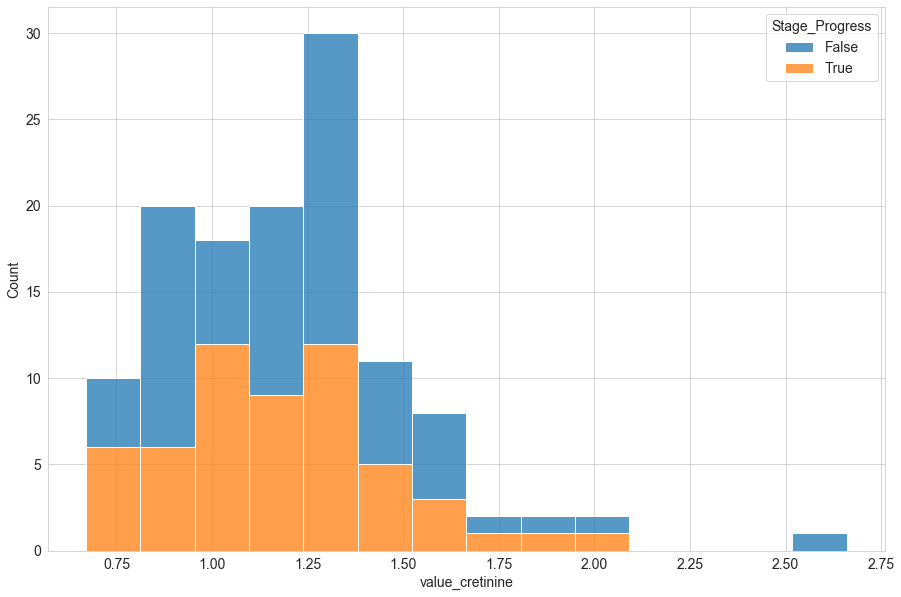

In [ ]:
sns.histplot(data=creatinine_level_men, x="value_cretinine", hue='Stage_Progress', multiple="stack");

For men the ideal range of cretinine level is 0.7 to 1.25. I observ the following trends
- People with low level of cretinine(0.75) seems to have high infection
- People having high cretinine level beyond the ideal range are 50% likely to have this infection. 

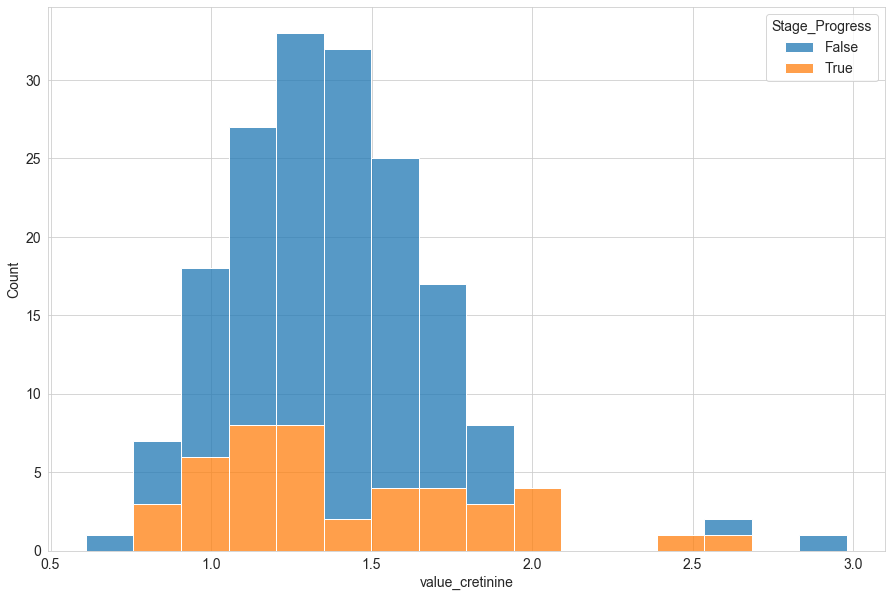

In [ ]:
sns.histplot(data=creatinine_level_female, x="value_cretinine", hue='Stage_Progress', multiple="stack");

For female the ideal range is  0.5 to 1.0. Here I observ the following trends
- Female in ideal range and beyound upto 1.8 is less likely to have kidney infections.
- The infection trend seems to be incresting from 1.8 to 2.6
- Low infection rate for extermly high level of cretinine for both male and female.

## Gluscose

Ideal range for glucose level should be between 3.9 to 5.5

In [ ]:
diabetic = df_renamed.value_glucose.apply(lambda num: 'Not Diabetic' if num >=3.9 and num<=5.5 else 'Diabetic/PreDiabetic')

In [ ]:
df_renamed['Diabetic Y/N'] = diabetic

C:\Users\Hargurjeet.Ganger\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_renamed.head()

,id,Race,Gender,Age,value_cretinine,value_dbp,value_sbp,value_hgb,value_glucose,value_ldl,Stage_Progress,Diabetic Y/N
0,0,Unknown,Male,70,1.29,95.32,134.11,13.51,6.24,161.49,True,Diabetic/PreDiabetic
1,1,White,Female,71,1.74,72.49,157.46,13.89,9.96,89.57,False,Diabetic/PreDiabetic
2,2,White,Female,57,2.51,81.13,132.89,15.34,7.24,61.62,True,Diabetic/PreDiabetic
3,3,White,Male,74,0.74,80.09,147.46,13.74,6.43,99.71,False,Diabetic/PreDiabetic
4,4,White,Female,50,1.34,82.23,128.78,13.21,8.76,65.73,True,Diabetic/PreDiabetic


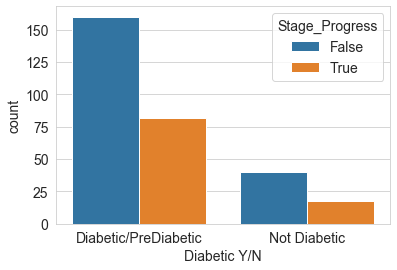

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Diabetic Y/N", hue ='Stage_Progress' ,data=df_renamed)
plt.show()

I conclude have having patient being diabetic or non diabetic has no singnificant impact of infection spread

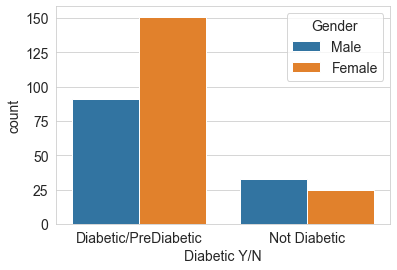

In [ ]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x="Diabetic Y/N", hue ='Gender' ,data=df_renamed)
plt.show()

In [ ]:
female_diabetic = df_renamed[df_renamed['Gender']=='Female']
male_diabetic = df_renamed[df_renamed['Gender']=='Male']

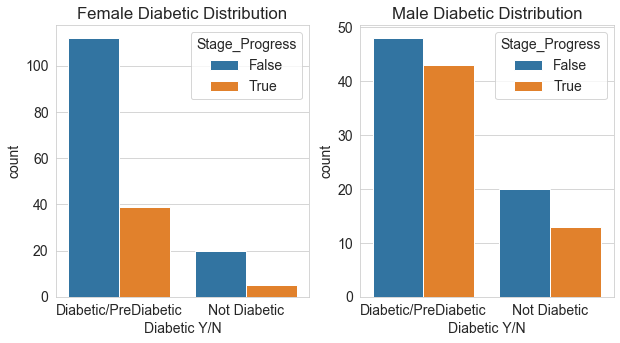

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
# fig.suptitle('Bigger 1 row x 2 columns axes with no data')

sns.countplot(ax=axes[0], x=female_diabetic['Diabetic Y/N'], hue ='Stage_Progress' ,data=df_renamed)
ax=axes[0].set_title('Female Diabetic Distribution')

sns.countplot(ax=axes[1], x=male_diabetic['Diabetic Y/N'], hue ='Stage_Progress' ,data=df_renamed)
ax=axes[1].set_title('Male Diabetic Distribution')


Hence in male the probablity of infection is high